In [43]:
%%html
<!--Script block to left align Markdown Tables-->
<style>
  table {margin-left: 0 !important;}
</style>

# ENGR 1330 Computational Thinking with Data Science 
Last GitHub Commit Date: 2 Mar 2021

## Lesson 13 : Probability Estimation Modeling

An extension of data modeling with special functions (probability distributions) where one axis is a probability estimate.

<!--![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson13/PsuedoLesson/roulette.png)-->

## Objectives
- To apply fundamental concepts involved in probability estimation modeling;
  - Concept of a fitting function (again)
- Introduce select special functions
  - Plotting position functions
  - Normal distribution function
  - Gamma distribution function
  - Extreme value distribution function
  - Pearson Type 3 distribution function
  

---

## Computational Thinking Concepts
The CT concepts include:

- Decomposition => Assert data are drawn from some process that is functionally explainable
- Abstraction => Represent data behavior with a function 
- Algorithm Design =>  Use the function to predict "new" values of observations
---

## Data Model Process

Recall the data modeling process we implemented last time:

1. Prepare our data series 
1. Select a function type as the data model (in this case polynomials of order 1 and 2)
2. Use a plotting tool to plot observed data (red) and our model (blue)
3. Adjust model parameters (b0,b1,b2, ...) to get the blue model to pass through the red dots as best we can.





### Recall the time/speed example:

Same as before, but allowing a cubic equation named polynomial.

In [44]:
# Our data ##################################
time = [0,1.0,2.0,3.0,4.0,5.0,6.0]
speed = [0,3,7,12,20,30,45.6]
# Our new model ##############################
def polynomial(b0,b1,b2,b3,x):
    # return y = b0 + b1*x + b2*x**2 + b3*x**3
    polynomial=b0+b1*x+b2*x**2+b3*x**3  
    return(polynomial)
# Our plotting function ######################
import matplotlib.pyplot as plt
def make2plot(listx1,listy1,listx2,listy2,strlablx,strlably,strtitle):
    mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
    plt.plot(listx1,listy1, c='red', marker='v',linewidth=0) # basic data plot
    plt.plot(listx2,listy2, c='blue',linewidth=1) # basic model plot
    plt.xlabel(strlablx)
    plt.ylabel(strlably)
    plt.legend(['Series 1','Series 2'])# modify for argument insertion
    plt.title(strtitle)
    plt.show()

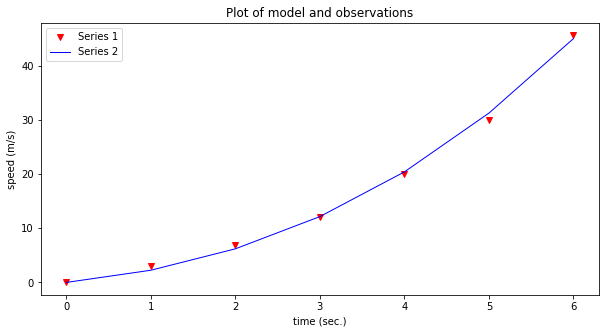

In [45]:
# Our "fitting" process ####################
intercept = 0.0      # set to 0.0
linear = 1.5          # adjust to 2.0
quadratic = 0.7     # adjust to 0.9 
cubic = 0.05
modelSpeed = [] # empty list
for i in range(len(time)):
    modelSpeed.append(polynomial(intercept,linear,quadratic,cubic,time[i]))
# Plotting results
make2plot(time,speed,time,modelSpeed,'time (sec.)','speed (m/s)','Plot of model and observations')

### Using our model

In [46]:
time2go = 6.5
print('Speed estimate at time ',time2go,'is ',polynomial(intercept,linear,quadratic,cubic,time2go))

Speed estimate at time  6.5 is  53.056250000000006


---
## Probability Estimation Modeling

Probability estimation modeling is the use of probability distributions (**population** data models) to model or explain behavior in observed (**sample** data) values.  
Once a particular distribution is selected, then the concept of risk (probability) can be explored for events of varying magnitudes.

Two important “extremes” in engineering:

- Uncommon (rare) events (floods, nuclear plant explosions, etc.)

- Common, almost predictable events (routine discharges, traffic accidents at a dangerous intersection, network failure on a due date, etc.)

The probability distribution is just a model of the data, like a trend line for deterministic behavior; different distributions have different shapes, and domains and can explain certain types of observations better than others.

Some Useful Distributions (data models) include:

- Normal
- LogNormal
- Gamma
- Weibull
- Extreme Value (Gumbell)
- Beta

There are many more; they all have the common property that they integrate to unity on the domain $-\infty~to ~ \infty$.  

The probability distributions (models) are often expressed as a density function or a cumulative distribution function. 

In [47]:
import math

def normdensity(mu,sigma,x):  # positional arguments are in form: parameters,variable
    weight = 1.0 /(sigma * math.sqrt(2.0*math.pi))
    argument = ((x - mu)**2)/(2.0*sigma**2)
    normdensity = weight*math.exp(-1.0*argument)
    return normdensity

def normdist(mu,sigma,x):
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist

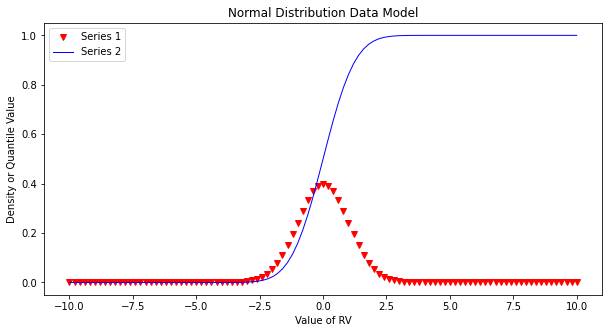

In [48]:
# Standard Normal Distribution Plots

mu = 0
sigma = 1

x = []
ypdf = []
ycdf = []

xlow = -10
xhigh = 10
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdensity(mu,sigma,xlow + i*xstep)
    ypdf.append(yvalue)
    yvalue = normdist(mu,sigma,xlow + i*xstep)
    ycdf.append(yvalue)  

#x
#ypdf
#ycdf
make2plot(x,ypdf,x,ycdf,"Value of RV",
          "Density or Quantile Value","Normal Distribution Data Model")

Make the plot above, nothing too special just yet. Plots of the density (in red) and cumulative density (probability) in blue.

### Exceedence Probability 

The purpose of distributions is to model data and allow us to estimate an answer to the question **what is the probability that we will observe a value of the random variable less than or equal to some sentinel value?**.  A common way to plot the quantile function ($F(X)$) is with accumulated probability on the horizontal axis, and random variable value on the vertical axis.
Consider the figure below;

![](http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/1-Lessons/Lesson13/PsuedoLesson/exceedence.png)

The RV Value is about 50,000 indicated by the horizontal magenta line.  
The blue curve is some data model, for instance one of our distributions below.
The accumulated probability value at 50,000 is 0.1 or roughly 10% chance, but we also have to stipulate whether we are interested in less than or greater than.  

In the figure shown, $P(x <= 50,000)~ =~1.00~-~0.1~= 0.9~or~90\%$ and is a non-exceedence probability. In words we would state 
"The probability of observing a value less than or equal to 50,000 is 90%" the other side of the vertical line is the exceedence probability; in the figure $P(x > 50,000)~=~0.1~or~10\%$.  In words we would state "The probability of observing a value equal to or greater than 50,000 is 10%."  In risk analysis the sense of the probability is easily confusing, so when you can - make a plot.  Another way to look at the situation is to simply realize that the blue curve is the quantile function $F(X)$ with $X$ plotted on the vertical axis, and $F(X)$ plotted on the horizontal axis.

Now lets put these ideas to use.  We will sample from the population of integers from 0 to 100, with replacement.  Any single pull from the population is equally likely. Lets take 25 samples (about 1/4 of the total population - usually we dont know the size of the population).

In [49]:
import numpy

population = []
for i in range(0,101,1):
    population.append(i)

In [50]:
#population

In [51]:
sample = numpy.random.choice(population,25)
sample

array([84, 78, 78, 39, 97, 82, 23, 34, 91,  4, 15, 94, 48, 90, 74, 78,  3,
       47, 73, 37, 47, 20, 50,  3, 87])

In [52]:
# lets get some statistics
sample_mean = sample.mean()
sample_variance = sample.std()**2

In [53]:
# sort the sample in place!
sample.sort()
# built a relative frequency approximation to probability, assume each pick is equally likely, use weibull plotting position formula
weibull_pp = []
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))

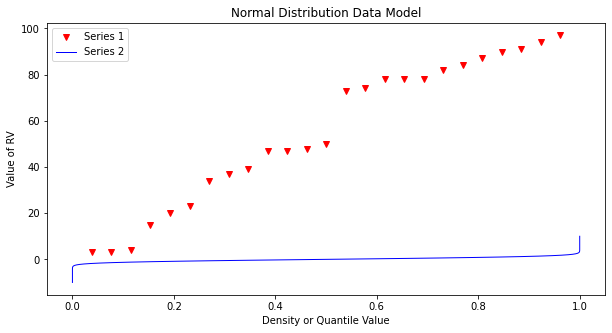

In [54]:
make2plot(weibull_pp, sample,ycdf, x,"Density or Quantile Value",
          "Value of RV","Normal Distribution Data Model")

What a horrible plot, but lets now use the sample statistics to "fit" the data model (blue) to the observations (red). Notice we have already rotated the axes so this plot and ones that follow are structured like the "Exceedence" plot above.

In [55]:
# Fitted Model

mu = sample_mean
sigma = math.sqrt(sample_variance)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(mu,sigma,xlow + i*xstep)
    ycdf.append(yvalue) 

In [56]:
mytitle = "Normal Distribution Data Model sample mean = : " + str(round(sample_mean,3)) +" sample variance =: " + str(round(sample_variance,3))                                                              

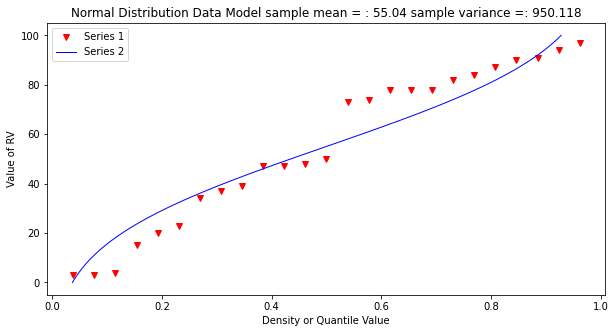

In [57]:
make2plot(weibull_pp, sample,ycdf, x,"Density or Quantile Value",
          "Value of RV",mytitle)

Now for grins, lets use population values because we sampled from a population that we already created above.

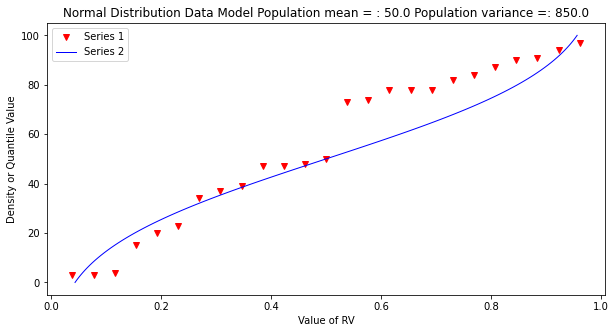

In [58]:
popmean = numpy.array(population).mean()
popvar = numpy.array(population).std()**2
# Fitted Model

mu = popmean
sigma = math.sqrt(popvar)

x = []
ycdf = []

xlow = 0
xhigh = 100
howMany = 100
xstep = (xhigh - xlow)/howMany

for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(mu,sigma,(xlow + i*xstep))
    ycdf.append(yvalue) 

    
# Now plot the sample values and plotting position
mytitle = "Normal Distribution Data Model Population mean = : " + str(round(popmean,3)) +" Population variance =: " + str(round(popvar,3))       
make2plot(weibull_pp, sample,ycdf, x,"Value of RV",
          "Density or Quantile Value",mytitle)

Some observations are in order:

- The population is a uniformly distributed collection. 
- By random sampling, and keeping the sample size small, the sample distribution appears approximately normal.  

Real things of engineering interest are not always bounded as shown here, the choice of the Weibull plotting position is not arbitrary.  The red dot scatterplot in practice is called the empirical distribution function, or empirical quantile function.   

Now we will apply these ideas to some realistic data.

### Beargrass Creek

The file `beargrass.txt` contains annual peak flows for Beargrass Creek.  The year is a water year, so the peaks occur on different days in each year; thus it is not a time series. Let's examine the data and see how well a Normal distribution data model fits, then estimate from the distribution the peak magnitude with exceedence probability 0.01 (1%-chance that will observe a value equal to or greater).

In [59]:
import pandas
beargrass = pandas.read_csv('beargrass.txt')  #Reading a .csv file
beargrass.head()

,Year,Peak
0,1945,1810
1,1946,791
2,1947,839
3,1948,1750
4,1949,898


<AxesSubplot:xlabel='Year'>

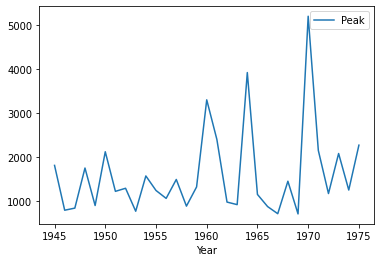

In [60]:
beargrass.plot(x='Year',y='Peak')

In [61]:
# what is the 25%,50%,75% "Peak"?,  min and max? 
beargrass.describe()

,Year,Peak
count,31.000000,31.000000
mean,1960.000000,1599.258065
std,9.092121,1006.239500
min,1945.000000,707.000000
25%,1952.500000,908.000000
50%,1960.000000,1250.000000
75%,1967.500000,1945.000000
max,1975.000000,5200.000000


 Now we will modify our already built code (***the miracle of cut-n-paste!***)

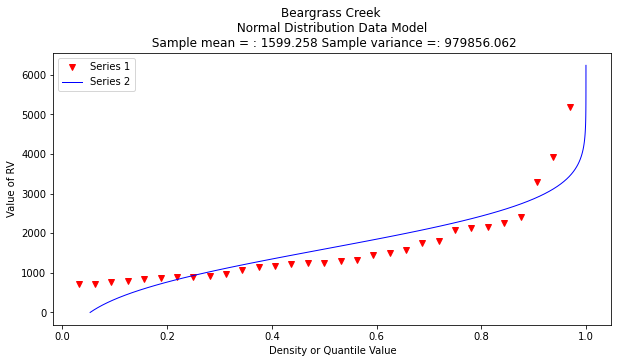

In [62]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(mu,sigma,xlow + i*xstep)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
mytitle = "Beargrass Creek \n Normal Distribution Data Model \n Sample mean = : " + str(round(sample_mean,3)) +" Sample variance =: " + str(round(sample_variance,3))       
make2plot(weibull_pp, sample,ycdf, x,"Density or Quantile Value",
          "Value of RV",mytitle)

In [63]:
beargrass['Peak'].describe()

count      31.000000
mean     1599.258065
std      1006.239500
min       707.000000
25%       908.000000
50%      1250.000000
75%      1945.000000
max      5200.000000
Name: Peak, dtype: float64

A 1% chance exceedence is on the right side of the chart, it is the compliment of 99% non-exceedence, in terms of our quantile function we want to find the value $X$ that returns a quantile of 0.99.

In [64]:
myguess = 3902  # 3903
print(mu,sigma)
print(round(normdist(mu,sigma,myguess),4))

1599.258064516129 989.8767915427474
0.99


In [65]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 1599.258064516129
    sigma = 989.8767915427474
    quantile = 0.99
    argument = (x - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))


3902.0558340839666


So a peak discharge of 4000 or so is expected to be observed with 1% chance, notice we took the value from the fitted distribution, not the empirical set.  

From visual interpretation, the Normal model is a so-so data model for **these** observations, and we would be encouraged to seek a better data model; its OK when we are operating near the mean value and $\pm$ 1 standard deviation, but is alarmingly off at either end where our risk interests lie.

### Log-Normal

Another data model we can try is log-normal, where we stipulate that the logarithms of the observations are normal.  The scripts are practically the same, but there is an inverse transformation required to recover original value scale.  Again we will use Beargrass creek.  

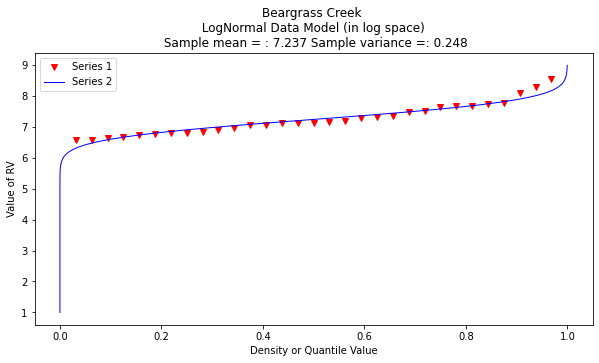

In [66]:
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))

logsample = beargrass['Peak'].apply(loggit).tolist() # put the peaks into a list
sample_mean = numpy.array(logsample).mean()
sample_variance = numpy.array(logsample).std()**2
logsample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = normdist(mu,sigma,xlow + i*xstep)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
# Now plot the sample values and plotting position
mytitle = "Beargrass Creek \n LogNormal Data Model (in log space) \n Sample mean = : " + str(round(sample_mean,3)) +" Sample variance =: " + str(round(sample_variance,3))       
make2plot(weibull_pp, logsample,ycdf, x,"Density or Quantile Value","Value of RV"
          ,mytitle)

The plot doesn't look too bad, but we are in log-space, which is hard to interpret, so we will transform back to arithmetic space 

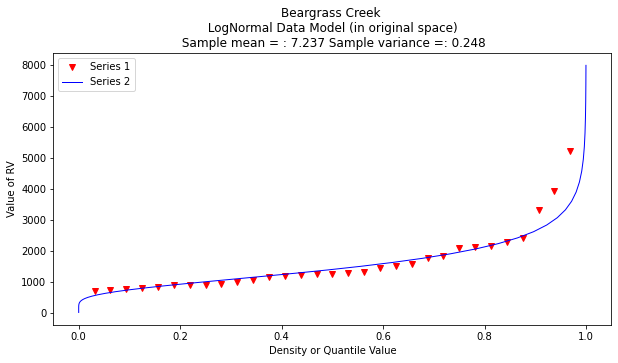

In [67]:
def antiloggit(x):  # A prototype function to log transform x
    return(math.exp(x))

sample = beargrass['Peak'].tolist() # pull original list
sample.sort() # sort in place
################
mu = sample_mean # Fitted Model in Log Space
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 1; xhigh = 1.05*max(logsample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(antiloggit(xlow + i*xstep))
    yvalue = normdist(mu,sigma,xlow + i*xstep)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
mytitle = "Beargrass Creek \n LogNormal Data Model (in original space) \n Sample mean = : " + str(round(sample_mean,3)) +" Sample variance =: " + str(round(sample_variance,3))       
make2plot(weibull_pp, sample,ycdf, x,"Density or Quantile Value",
          "Value of RV",mytitle)

Visually a better data model, now lets determine the 1% chance value.

In [68]:
myguess = 5000
print(mu,sigma)
print(normdist(mu,sigma,loggit(myguess))) # mu, sigma already in log space - convert myguess

7.23730905616488 0.4984855728993489
0.9948789251186081


In [69]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    mu = 7.23730905616488
    sigma = 0.4984855728993489
    quantile = 0.995
    argument = (loggit(x) - mu)/(math.sqrt(2.0)*sigma)    
    normdist = (1.0 + math.erf(argument))/2.0
    return normdist - quantile

print(newton(f, myguess))

5020.690747057739


Now we have a decent method, we should put stuff into functions to keep code concise, lets examine a couple more data models

### Gumbell (Double Exponential) Distribution

The Gumbell is also called the Extreme-Value Type I distribution, the density and quantile function are:

$$ \text{pdf(x)} = \frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ]$$

$$ F(X) =  \int_{-\infty}^X{\frac{1}{\beta} \cdot exp [-\frac{(x-\alpha)}{\beta} - exp (-\frac{(x-\alpha)}{\beta}) ] dx} = exp [- exp (-\frac{(X-\alpha)}{\beta})] $$

The distribution has two parameters, $\alpha$ and $\beta$, which in some sense play the same role as mean and variance. Lets modify our scripts further to see how this data model performs on the Bearcreek data.

Of course we need a way to estimate the parameters, a good approximation can be obtained using:

$$ \alpha = \mu \cdot \frac{\sqrt{6}}{\pi} $$

and

$$ \beta = 0.45 \cdot \sigma $$

where $\mu$ and $\sigma^2$ are the sample mean and variance.

In [70]:
def ev1dist(alpha,beta,x):
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist

Now literally substitute into our prior code!

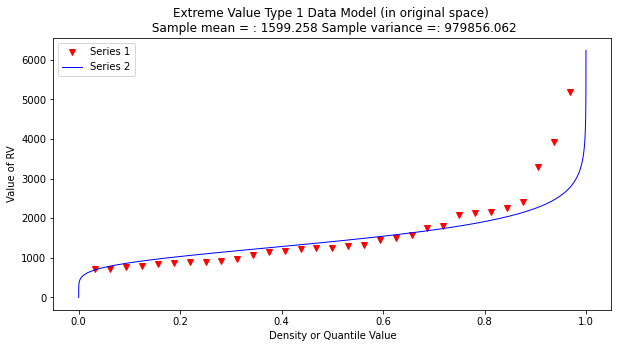

In [71]:
sample = beargrass['Peak'].tolist() # put the peaks into a list
sample_mean = numpy.array(sample).mean()
sample_variance = numpy.array(sample).std()**2
alpha_mom = sample_mean*math.sqrt(6)/math.pi
beta_mom = math.sqrt(sample_variance)*0.45
sample.sort() # sort the sample in place!
weibull_pp = [] # built a relative frequency approximation to probability, assume each pick is equally likely
for i in range(0,len(sample),1):
    weibull_pp.append((i+1)/(len(sample)+1))
################
mu = sample_mean # Fitted Model
sigma = math.sqrt(sample_variance)
x = []; ycdf = []
xlow = 0; xhigh = 1.2*max(sample) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = ev1dist(alpha_mom,beta_mom,xlow + i*xstep)
    ycdf.append(yvalue) 
# Now plot the sample values and plotting position
mytitle = "Extreme Value Type 1 Data Model (in original space) \n Sample mean = : " + str(round(sample_mean,3)) +" Sample variance =: " + str(round(sample_variance,3))       
make2plot(weibull_pp, sample,ycdf, x,"Density or Quantile Value",
          "Value of RV",mytitle)

Again a so-so visual fit.
To find the 1% chance value

In [72]:
myguess = 3269
print(alpha_mom,beta_mom)
print(1.0 - ev1dist(alpha_mom,beta_mom,myguess)) # 

1246.9363972503857 445.4445561942363
0.010622687292172417


In [73]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    alpha = 1246.9363972503857
    beta = 445.4445561942363
    quantile = 0.99
    argument = (x - alpha)/beta
    constant = 1.0/beta
    ev1dist = math.exp(-1.0*math.exp(-1.0*argument))
    return ev1dist - quantile

print(newton(f, myguess))

3296.047827999136


### Pearson Type 3 (particular case of a Gamma Distribution)

One last data model to consider is one that is specifically **stipulated for use by federal agencies for probability estimation of extreme hydrologic events**.  The data model is called the Log-Pearson Type III distribution, its actually a specific case of a Gamma distrubution.  

This example we will dispense with tyring to build it in python primative, and just use a package - the density function is not all that hard, but the quantile function is elaborate.  

Learn more at http://54.243.252.9/engr-1330-psuedo-course/CECE-1330-PsuedoCourse/3-Readings/NumericalRecipesinF77.pdf (in particular around Page 276)

As usual, lets let Google do some work for us, using the search term "gamma quantile function; scipy" we get to this nice blog entry https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html which is a good start. 

A Pearson Type III data model has the following density function:

$$ f(x|\tau,\alpha,\beta) = \frac{(\frac{x-\tau}{\beta})^{\alpha -1}\cdot exp( - \frac{x-\tau}{\beta})}{|\beta| \Gamma(\alpha)}$$

If we make some substitutions:
$ \lambda = \frac{1}{\beta} ; \hat{x} = x -\tau $ then the density function is

$$ f(\hat{x}) = \frac{ 1}{\Gamma(\alpha)} (\lambda \hat{x})^{\alpha -1}\cdot exp( - \lambda \hat{x} )$$

which is now a one parameter Gamma density function just like the example in the link.

Reading a little from Bulletin 17C (need a link) we can relate the transformations to descriptive statistics (shown below without explaination) as:

$\mu = \text{sample mean}$,

$\sigma = \text{sample standard deviation}$, 

$\gamma = \text{sample skew coefficient} = (\frac{n}{\sigma^3(n-1)(n-2)})\sum_{i=1}^n(x_i - \mu)^3 $

$\alpha = \frac{4}{\gamma^2}$  

$\beta = sign(\gamma)\sqrt{\frac{\sigma^2}{\alpha}}$

$\tau = \mu - \alpha \cdot \beta$

So we have a bit of work to do.  The name of the functions in `scipy` we are interested in are `gamma.pdf(x,a)` and `gamma.cdf(x,a)`  So lets build a tool to generate a Log-Pearson Type III data model, then apply it to Beargrass Creek.  We will use a lot of glue here.

First load in dependencies, and define support functions we will need 

In [74]:
import scipy.stats # import scipy stats package
import math        # import math package
import numpy       # import numpy package
# log and antilog
def loggit(x):  # A prototype function to log transform x
    return(math.log(x))
def antiloggit(x):  # A prototype function to inverse logx (x = 10^logx)
    return(math.exp(x))
def weibull_pp(sample): # plotting position function
# returns a list of plotting positions; sample must be a numeric list
    weibull_pp = [] # null list to return after fill
    sample.sort() # sort the sample list in place
    for i in range(0,len(sample),1):
        weibull_pp.append((i+1)/(len(sample)+1))
    return weibull_pp


Then the gamma distribution from scipy, modified for our type of inputs.

In [75]:
def gammacdf(x,tau,alpha,beta): # Gamma Cumulative Density function - with three parameter to one parameter convert
    xhat = x-tau
    lamda = 1.0/beta
    gammacdf = scipy.stats.gamma.cdf(lamda*xhat, alpha)
    return gammacdf

Then load in the data from the data frame, log transform and generate descriptive statistics.

In [76]:
#sample = beargrass['Peak'].tolist() # put the peaks into a list
sample = beargrass['Peak'].apply(loggit).tolist() # put the log peaks into a list
sample_mean  = numpy.array(sample).mean()
sample_stdev = numpy.array(sample).std()
sample_skew  = 3.0 # scipy.stats.skew(sample)
sample_alpha = 4.0/(sample_skew**2)
sample_beta  = numpy.sign(sample_skew)*math.sqrt(sample_stdev**2/sample_alpha)
sample_tau   = sample_mean - sample_alpha*sample_beta

Now generate plotting positions for the sample observations

In [77]:
plotting = weibull_pp(sample)

Now generate values for the data model (for plotting our blue line "fit"), set limits to be a little beyond the sample range.

In [78]:
x = []; ycdf = []
xlow = (0.9*min(sample)); xhigh = (1.1*max(sample)) ; howMany = 100
xstep = (xhigh - xlow)/howMany
for i in range(0,howMany+1,1):
    x.append(xlow + i*xstep)
    yvalue = gammacdf(xlow + i*xstep,sample_tau,sample_alpha,sample_beta)
    ycdf.append(yvalue) 

Now reverse transform back to native scale, and plot the sample values vs plotting position in blue, and the data model in red

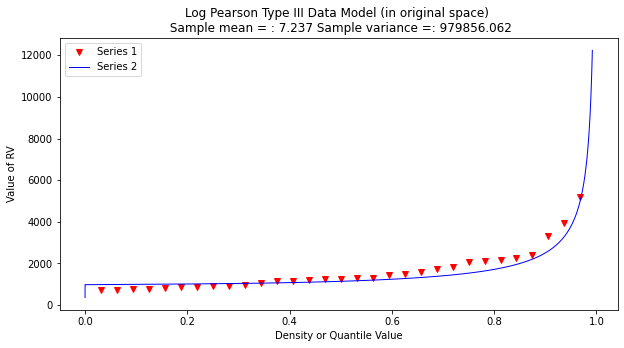

In [79]:
# reverse transform the peaks, and the data model peaks
for i in range(len(sample)):
    sample[i] = antiloggit(sample[i])
for i in range(len(x)):
    x[i] = antiloggit(x[i])
    
# Now plot the sample values and plotting position
mytitle = "Log Pearson Type III Data Model (in original space) \n Sample mean = : " + str(round(sample_mean,3)) +" Sample variance =: " + str(round(sample_variance,3))       
make2plot(plotting, sample,ycdf, x,"Density or Quantile Value",
          "Value of RV",mytitle)

And as before lets find the value that retruns the 99% quantile - we will just use the newton method above.
First recover the required model parameters. Then we will paste these into the $f(x)$ function for the Newton's method.

In [80]:
print(sample_tau)
print(sample_alpha)
print(sample_beta)

6.904985340898647
0.4444444444444444
0.7477283593490234


In [81]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.9900
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  5000
print(newton(f, myguess))

5856.10913158364


Trust, but verify!

In [82]:
round(gammacdf(loggit(5900.109),sample_tau,sample_alpha,sample_beta),4)

0.9756

Now lets summarize our efforts regarding Beargrass Creek annual peaks and probabilities anticipated.

|Data Model|99% Peak Flow|Remarks|
|:---|:---|:---|
|Normal|3902|so-so visual fit|           
|Log-Normal|4433|better visual fit|            
|Gumbell|3296|better visual fit|            
|Log-Pearson III|5856|best (of the set) visual fit|

At this point, now we have to choose our model and then can investigate different questions.  So using LP3 as our favorite, lets now determine anticipated flow values for different probabilities (from the data model) - easy enought to just change the quantile value and rerun the newtons optimizer, for example:

|Exceedence Probability|Flow Value|Remarks|
|:---|:---|:---|
|25% |968| First Quartile Divider|           
|50% |1302| Median, and Second Quartile Divider|            
|75% |1860| 3rd Quartile Divider|            
|90% |2706| 10% chance of greater value|
|99% |5856| 1% chance of greater value (in flood statistics, this is the 1 in 100-yr chance event)|
|99.8%|9420| 0.002% chance of greater value (in flood statistics, this is the 1 in 500-yr chance event)|
|99.9%|11455| 0.001% chance of greater value (in flood statistics, this is the 1 in 1000-yr chance event)|

In [83]:
# If we want to get fancy we can use Newton's method to get really close to the root

from scipy.optimize import newton

def f(x):
    sample_tau = 5.976005311346212
    sample_alpha = 6.402272915026134
    sample_beta = 0.1970087438569494
    quantile = 0.50
    argument = loggit(x)
    gammavalue = gammacdf(argument,sample_tau,sample_alpha,sample_beta)
    return gammavalue - quantile

myguess =  1000
print(newton(f, myguess))

1302.814639184079


## References:

0. Computational and Inferential Thinking: The Foundations of Data Science. By Ani Adhikari and John DeNero, with Contributions by David Wagner and Henry Milner.  Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0). https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html

1. Computational and Inferential Thinking: The Foundations of Data Science. By Ani Adhikari and John DeNero, with Contributions by David Wagner and Henry Milner.  Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0). https://www.inferentialthinking.com/chapters/15/Prediction.html

2. Jamie Chan (2014) Learn Python in One Day and Learn It Well. LCF Publishing. Kindle Edition. http://www.learncodingfast.com/python

3. Grus, Joel. Data Science from Scratch: First Principles with Python. O'Reilly Media. Kindle Edition. (http://safaribooksonline.com)

2. Christian, B, and Griffiths Tom (2016) Algorithms to live by: The computer science of human decisions. Henry Holt and Company, ISBN 9781627790369 (hardcover)|ISBN 9781627790376 (electronic book)

3. https://www.amazon.com/Distributional-Statistics-Environment-Statistical-Computing/dp/1463508417
    
4. England, J.F. Jr., Cohn, T.A., Faber, B.A., Stedinger, J.R., Thomas Jr., W.O., Veilleux, A.G., Kiang, J.E., and Mason, R.R.Jr., 2018, Guidelines for Determining Flood Flow Frequency—Bulletin 17C: U.S. Geological Survey Techniques andMethods, book 4, chap. B5, 146 p., https://doi.org/10.3133/tm4B5

5. https://www.astroml.org/book_figures/chapter3/fig_gamma_distribution.html


In [84]:
# Preamble script block to identify host, user, and kernel
import sys
! echo 'Hostname: ' $HOSTNAME
! echo 'Username: ' $USER
#print(sys.executable,sys.version)
#print(sys.version)
#print(sys.version_info)
#! pwd

Hostname:  atomickitty
Username:  sensei
